#**Letter classification using CNN**

## Table of Content
   
1. [Data Description](#cell_Preparation)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Model Construction](#cell_model)

4. [Model Execution](#cell_execution)
 
5. [Experiments Report](#cell_report)



## Executive Summary

Companies deals with a lot of documents that are essential in running the business, which are often in a text non-machine readable form (e.g. scanned documents from hardprints). This makes data processing (e.g. document editing, information querying, etc.) time consuming. It would be ideal if the business can readily covert these documents in a form that would make the specified process efficient. Under this context, a classification model for determining characters (i.e. letters) from handwritten or scanned documents is built as a demonstrative example.

The dataset used in the demonstration is the EMNIST Letters dataset, which consists of images of 145,600 characters with 26 classes corresponding to each letter in the alphabet. The characters are a mix of uppercase and lowercase handwritten letters. The prediction model built uses Convolutional Neural Network (CNN). This method is well known for its ability to efficiently and effectively learn relationships between linear and non-linear data and is fairly simple to construct despite its ability to solve complex computational problems. In addition, it performs relatively well when input data are images. Therefore, CNN will be applied on the prediction of letters from non-machine readable texts.

The experimentation on the application of the CNN model to the dataset will be carried out in the following manner:
*   An optimisation function where varying values of different hyperparameters of the model (e.g. hidden layers, regularizations, initializers, optimizers and learning rates, etc.) will be defined
*   Using a metric (i.e. accuracy), the different models created using the optimisation function will be evaluated and the model with the best hyperparameter will be chosen
*   The hyperparameters of the best model will be fitted (i.e. model will be re-trained) to the dataset
*   The model with best metric (i.e. accuracy) will be evaluated in terms of model loss, accuracy, and prediction ability

<a id = "cell_Preparation"></a>
## 1. Data Description

#### **1.1. Loading of data and standard libraries**

In [ ]:
from __future__ import print_function
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
pip install emnist

In [ ]:
from emnist import extract_training_samples, extract_test_samples
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')

#### **1.2. Dataset characteristics**

The dataset used in this experiment is the EMNIST Letters dataset. It is comprised of 145,600 characters with 26 classes corresponding to each letter in the alphabet. The characters are a mix of uppercase and lowercase handwritten letters. Each character is made up of a 28x28 array with values ranging from 0 to 255 (i.e. corresponding to greyscale color assignment). The images below illustrate examples of how the arrays look like when plotted.

In [ ]:
print(x_train[0].shape)
x_train[0]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  20, 109, 114,  45,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 114, 245, 253, 214,   5,   0,   0,   0,   0,   0,
         20, 100,  33,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 125, 249, 254, 233,  22,   0,   0,   0,   0,  10,
        123, 238, 163,  33,   0,   0,   0,   0,   2,   4,   4,   0,   0,
          0,   0],
       [  0,   0,   0,  82, 233, 254, 251,  82,   2,   0,   0,   3,  79,
        220, 254, 244, 126,   0,   0,   0,   3,  77, 125, 113,   8,   0,
          0,   0],
       [  

In [ ]:
def plot_image(x_train):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_train[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

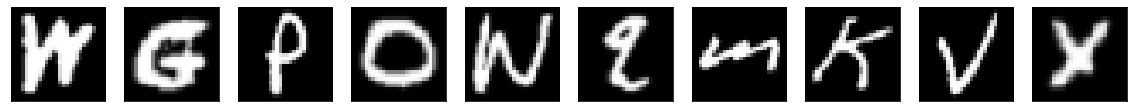

In [ ]:
plot_image(x_train)

#### **1.3. Data specification**

The label of the dataset are numbers ranging from 1 to 26, where each number correspond to the order of the letter in the alphabet (e.g. a = 1; b = 2; c =3; etc.). The input variables to the model would be the value in the arrays of each character, which form the image of handwritten letters as shown in Section 1.2.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

Necessary pre-processing, specifically normalisation and reshaping of variables, have been conducted in order to be able to conduct proper data preparation for modelling. The values in the arrays were normalised to values ranging from 0 to 1 to assist in model accuracy and ensure equal weights of inputs throughout the process. These inputs have then been flattened and reshaped to a dimension of 28x28 pixels with 1 channel (i.e. greyscale image).

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(x_train[0].shape)
x_train[0]

(28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843138, 0.42745098,
        0.44705883, 0.1764706 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(124800, 784)
(20800, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical

img_rows = 28
img_cols = 28
img_ch = 1

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, img_ch)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, img_ch)
input_shape = (img_rows, img_cols, img_ch)

print(x_train.shape)
print(x_test.shape)

(124800, 28, 28, 1)
(20800, 28, 28, 1)


<a id = "cell_model"></a>
## 3. Model Construction

Convolutional Neural Network is utilised to predict the value of each handwritten letter in the EMNIST Letters dataset. To derive the best model architecture for the problem, a function to determine the optimal number of hyperparameters for the Conv2D layers and units, initializer, regularizer, and overall model optimizer is defined. The experiment has been run for 600 epochs with batches of 128. _Summary result_ shows the number of convolutional layers and optimal hyperparameters for the best model constructed using the optimisation function.

Ultimately, it has been found that a model architecture with the NAdam optimizer, 3 Conv2D layers, and variations in hyperparameter values for layer units, regularizers, and initializers, is the most optimal.

In [ ]:
pip install -U keras-tuner

In [ ]:
import keras_tuner
import tensorflow as tf
import numpy as np

In [ ]:
def build_model(hp):
    input_img = tf.keras.Input(shape=(input_shape))
    x = input_img
    for i in range(hp.Int('cnn_layers', 1, 2, default=2)):
        x = tf.keras.layers.Conv2D(
            filters=hp.Int(f"filters_{i}", 4, 32, step=4, default=8),
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            kernel_initializer=hp.Choice(f"kin_{i}", ["glorot_normal", "he_normal","random_normal"]),
            kernel_regularizer=hp.Choice(f"kreg_{i}", ["L1", "L2", "L1L2"]),
            bias_regularizer=hp.Choice(f"breg_{i}", ["L1", "L2", "L1L2"]),
        )(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.LeakyReLU(alpha=.001)(x)
        x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    
    for i in range(hp.Int('cnn_layers_1', 1, 2, default=2)):
        x = tf.keras.layers.Conv2D(
            filters=hp.Int(f"filters_1_{i}", 4, 32, step=4, default=8),
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            kernel_initializer=hp.Choice(f"kin_{i}", ["glorot_normal", "he_normal","random_normal"]),
            kernel_regularizer=hp.Choice(f"kreg_{i}", ["L1", "L2", "L1L2"]),
            bias_regularizer=hp.Choice(f"breg_{i}", ["L1", "L2", "L1L2"]),
        )(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.LeakyReLU(alpha=.001)(x)
        x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
        x = tf.keras.layers.UpSampling2D((2, 2))(x)

    x = tf.keras.layers.Flatten()(x)
        
    output = tf.keras.layers.Dense(27, activation="softmax")(x)
    model = tf.keras.Model(input_img, output)

    optimizer = hp.Choice('optimizer', ['adam', 'nadam', 'SGD', 'RMSprop'])
    model.compile(
        optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']
    )
    return model

In [ ]:
tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_accuracy",
    max_epochs=2,
    factor=3,
    hyperband_iterations=1,
    directory="results",
    project_name="emnist",
    overwrite=True,
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

keras_callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=20, verbose=0)
]

In [ ]:
tuner.search(
    x_train,
    y_train,
    steps_per_epoch=600,
    validation_data=(x_test, y_test),
    batch_size=128,
    validation_steps=100,
    callbacks=keras_callbacks,
)

Trial 2 Complete [00h 02m 24s]
val_accuracy: 0.8784375190734863

Best val_accuracy So Far: 0.8784375190734863
Total elapsed time: 00h 06m 33s


In [ ]:
tuner.results_summary(1)

Results summary
Results in results/emnist
Showing 1 best trials
Trial summary
Hyperparameters:
cnn_layers: 1
filters_0: 4
kin_0: glorot_normal
kreg_0: L2
breg_0: L1
filters_1: 8
kin_1: random_normal
kreg_1: L1
breg_1: L1L2
cnn_layers_1: 2
filters_1_0: 8
filters_1_1: 12
optimizer: nadam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8784375190734863


In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.build(input_shape=(None,28,28,1))
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 4)         40        
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 4)        16        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 4)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         296   

The summary of the hyperparameters shows the architecture of the best model defined by the model optimisation function. Generally, the model is built with 3 hidden convolutional layers and 27 output nodes, with NAdam as the optimizer. The output nodes for each convolutional layer vary from 4 to 12, with each layer having different values for the kernel initializer (i.e. random_normal or glorot_normal), bias and kernel regularizers (i.e. L1, L2, or L1L2). The convolutional layers made use of the relu activation function to maximise the convergence performance of the model and improve computational efficiency. Batch normalisation is also used to optimise the model fitting process. LeakyReLU, on the other hand, is implemented to avoid/reduce saturation problems of neurons. Moreover, the output node is set to 27 with the softmax activation function, which is ideal for multi-class classification. Lastly, the loss function used is sparse categorical entropy with metric to maximise as accuracy.

The following describes the model architecture of the best model for each constructed layer:

*   Conv2D: (3x3 inputs + 1 bias) x 4 outputs = 40 parameters
*   Batch normalization: 4 outputs x 4 outputs = 16 parameters
*   Conv2D_1: (3x3 inputs x 4 outputs + 1 bias) x 8 hidden nodes = 296 parameters
*   Batch normalization_1: 4 outputs x 8 outputs = 32 parameters
*   Conv2D_2: (3x3 inputs x 8 outputs + 1 bias) x 12 hidden nodes = 876 parameters
*   Batch normalization_2: 4 outputs x 12 outputs = 48 parameters
*   Output layer: (2352 inputs x 27 outputs) = 63,531 parameters

<a id = "cell_execution"></a>
## 4. Model Execution

The hyperparameters discovered in the experiments through running the pre-defined optimisation function have been derived to build a model to fit the data for validation purposes. For this reason, several trials have been executed to determine the best batch size to which the samples will be fitted, taking note of the machine memory (e.g. lack of access to GPU) and time efficiency of each run. In some existing studies relating to neural networks, it has been found that the batch size could be related to accuraacy and goodness-of-fit of models.

The results of experiments for other batch sizes aside from the one reported have not been published due too  limitation in the machine memory. However, values 32, 50, 64, 128, 256, and 512 have been tested, where 512 has shown the highest accuracy. For the same rationale, values other than that mentioned have not been tried.

In [ ]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])

In [ ]:
hist = model.fit(x_train, y_train,
                epochs=30,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=keras_callbacks)

<a id = "cell_report"></a>
## 5. Experiments Report

The created model has been evaluated in terms of loss and accuracy. An overall accuracy of 90.81% is achieved for the validation stage with a 0.2414 loss at the 30th epoch.

The _line graph_ shows the model loss and accuracy for training and validation stages over the epochs. With a decreasing convex downward slope for both stages, it can be deduced that the model fits both the training and validation data well. However, it can be observed that there is a gap between the training and validation losses. Although this isn't much of a problem considering both follows a decreasing trend, it is optimal to close the gap. It is therefore recommended for future experiments to either increase the sample size or the number of epochs to see if the model can reach a lowe global loss minimum.

The accuracy metrics, on the other hand, is able to reach around 90% from the sixth epoch. This is a good indication of the model's predictive performance. To test this, an example prediction has been conducted for a single sample. Results show that the predicted label is 17, which is equivalent to 'Q' or 'q' in the alphabet. Upon visualisation of the sample inputs, it can be seen that a handwritten 'q' is the actual label; therefore indicating that the prediction is correctly made.

The constructed model can be used to make predictions on possible employee attritions. With employees being one of the most important parts of an organisation, employee attritions can lead to serious and irreparable costs to companies (e.g. loss of nontransferable skills, business connections, client trust, etc.). Therefore, having had predicted a possible attrition, especially that of an excellent employee, would give the company an opportunity to make actions to potentially prevent the churn. The created model can be run by companies in fixed intervals (e.g. yearly) or in cases of organisational restructuring.

In [ ]:
%matplotlib inline

def plot_hist(h, xsize=6, ysize=10):
    
    # Find what measurements were recorded
    meas = h.keys()
    
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    
    # Plot each measurement
    meas_list = []
    for m in meas:
        plt.plot(h[m])
        meas_list.append(m)

    # Add info to the plot
    ylab = ', '
    plt.ylabel(ylab.join(meas_list))
    plt.xlabel('epoch')
    plt.legend(meas_list) #, loc='upper left')
    plt.show()
    return

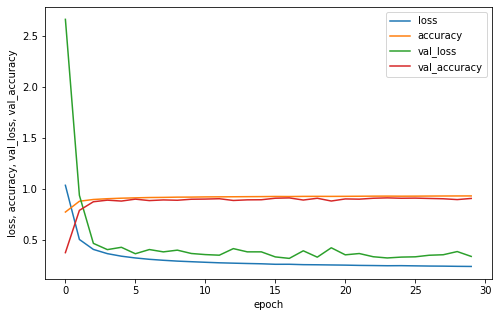

In [ ]:
plot_hist(hist.history, xsize=8, ysize=5)

In [ ]:
import random
len(x_test)
j = random.randint(0,(len(x_test)))
pred = model.predict(x_test[j].reshape(1, 28, 28, 1))
print(pred.argmax())

17


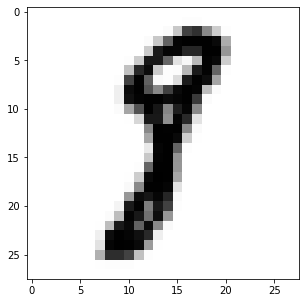

In [ ]:
pic1 = x_test[j].reshape(28,28)
plt.imshow(pic1, cmap='Greys')